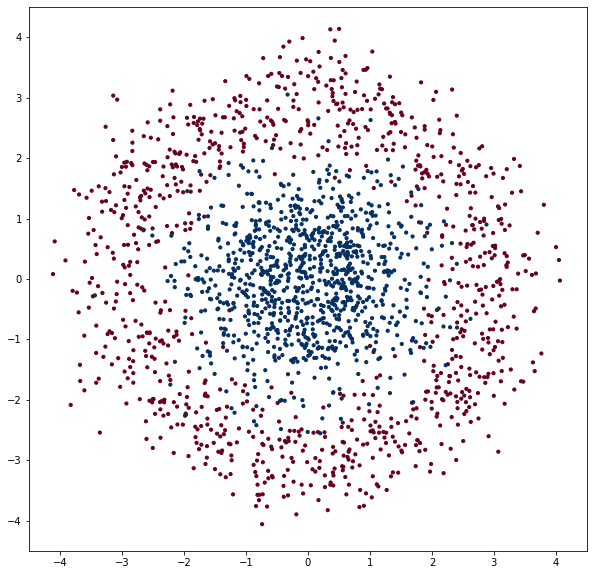

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from random import random
import tensorflow as tf
from tensorflow import keras
import sklearn
from sklearn.model_selection import train_test_split
import scipy.io

mat = scipy.io.loadmat('dataset2.mat')
mat = np.array(mat['data'])
data = np.empty((0,2))
label = np.empty(0)
for el in mat:
    data = np.append(data, [el[:2]], axis= 0)
    label = np.append(label, el[2:], axis= 0)


x_train, x_test, y_train, y_test = train_test_split(data, label, test_size = 0.2)
plt.rcParams['figure.figsize'] = [10, 10]
plt.ylim((-4.5,4.5))
plt.xlim((-4.5,4.5))
plt.scatter(data[:,0], data[:,1], s=10, c=label, cmap='RdBu')

In [2]:
model1 = keras.Sequential()
model1.add(keras.layers.Dense(5, input_shape = (2,), activation = "relu"))
model1.add(keras.layers.Dense(5, activation = "relu"))
model1.add(keras.layers.Dense(1, activation = "sigmoid"))

model1.compile(optimizer = "adam", loss='binary_crossentropy', metrics=['accuracy'])
history1 = model1.fit(x_train, y_train, epochs = 400, validation_split = 0.15, batch_size = 800, verbose = 0)

In [3]:
model2 = keras.Sequential()
model2.add(keras.layers.Dense(2, input_shape = (2,), activation = "relu"))
model2.add(keras.layers.Dense(1, activation = "sigmoid"))

model2.compile(optimizer = "adam", loss='binary_crossentropy', metrics=['accuracy'])
history2 = model2.fit(x_train, y_train, epochs = 400, validation_split = 0.15, batch_size = 800, verbose = 0)

In [4]:
model3 = keras.Sequential()
model3.add(keras.layers.Dense(25, input_shape = (2,), activation = "relu"))
model3.add(keras.layers.Dense(70, activation = "relu"))
model3.add(keras.layers.Dense(70, activation = "relu"))
model3.add(keras.layers.Dense(60, activation = "relu"))
model3.add(keras.layers.Dense(1, activation = "sigmoid"))

model3.compile(optimizer = "adam", loss='binary_crossentropy', metrics=['accuracy'])
history3 = model3.fit(x_train, y_train, epochs = 400, validation_split = 0.15, batch_size = 800, verbose = 0)

In [5]:
def plot_loss(history):
    history_dict = history.history

    loss_values = history_dict['loss']
    val_loss_values=history_dict['val_loss']
    plt.plot(loss_values,'b',label='training loss')
    plt.plot(val_loss_values,'r',label='val training loss')
    plt.legend()
    plt.xlabel("Epochs")

In [6]:
def plot_acc(history):
    history_dict = history.history
    accuracy_values = history_dict['accuracy']
    val_accuracy_values=history_dict['val_accuracy']
    plt.plot(val_accuracy_values,'-r',label='val_accuracy')
    plt.plot(accuracy_values,'-b',label='acc')
    plt.legend()

In [7]:
def evaluate(model):
    loss, acc = model.evaluate(x_test, y_test, verbose = 0)
    print("Test loss: ", loss)
    print("Test accuracy: ", acc)

In [8]:
def conf_matrix(model):
    predict = model.predict(x_train)
    predict = np.round(predict, 0)
    confusion = tf.math.confusion_matrix(labels=y_train, predictions=predict)
    confusion = np.array(confusion)
    precis = 100*confusion[1][1]/(confusion[1][0]+confusion[1][1])
    recall = 100*confusion[1][1]/(confusion[0][1]+confusion[1][1])
    precis = np.round(precis, 2)
    recall = np.round(recall, 2)
    print(confusion, precis, recall)

In [9]:
def plot_decision_boundary(X, y, model, steps=500, cmap='Paired'):
    cmap = plt.get_cmap(cmap)

    # Define region of interest by data limits
    xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
    ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
    steps = 500
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    # Make predictions across region of interest
    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Plot decision boundary in region of interest
    z = labels.reshape(xx.shape)

    fig, ax = plt.subplots()
    ax.contourf(xx, yy, z, cmap=cmap, alpha=0.5)

    # Get predicted labels on training data and plot
    train_labels = model.predict(X)
    ax.scatter(X[:,0], X[:,1], s=10, c=y, cmap=cmap, lw=0)
    plt.ylim((-4.5,4.5))
    plt.xlim((-4.5,4.5))
    return fig, ax

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x13e0abc4c08>)

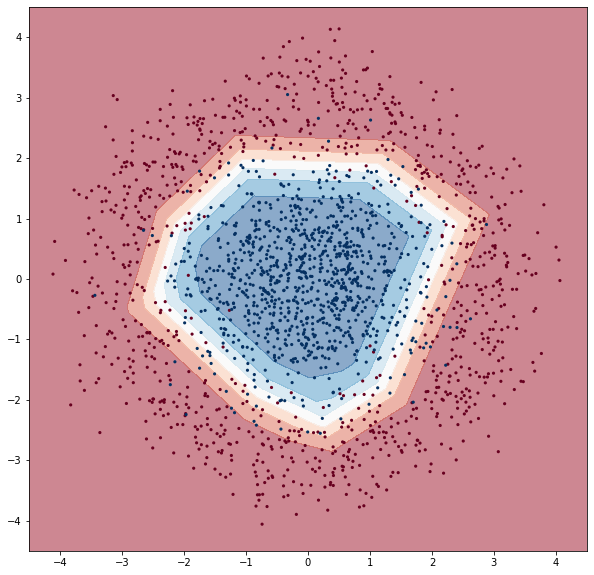

In [10]:
plot_decision_boundary(data, label, model1, cmap='RdBu')

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x13e0aa1ac48>)

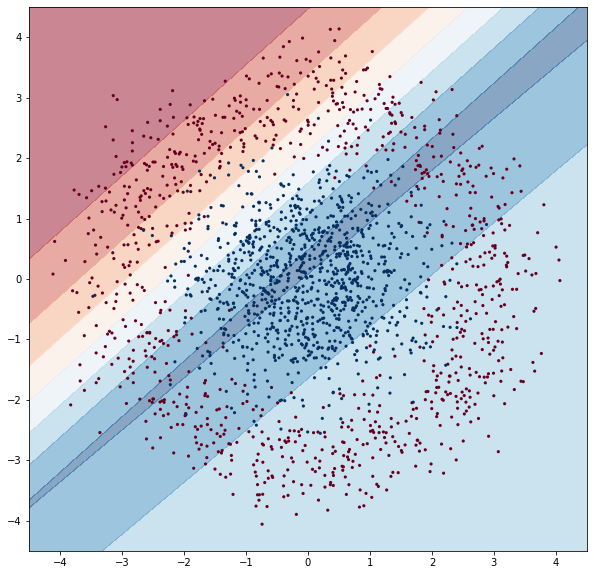

In [11]:
plot_decision_boundary(data, label, model2, cmap='RdBu')

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x13e0a112a48>)

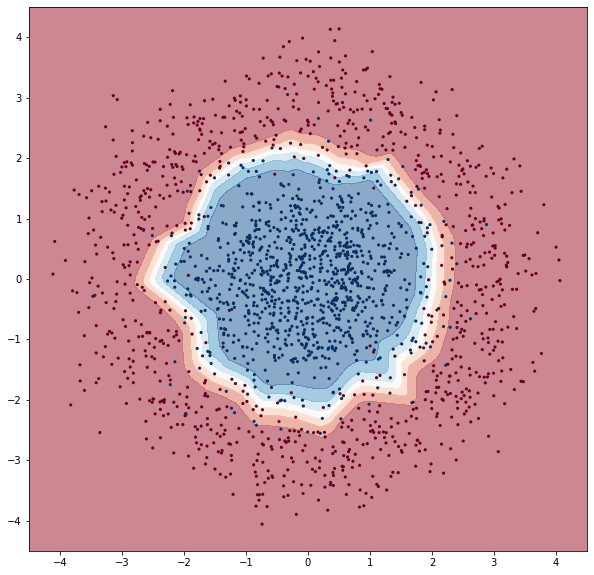

In [12]:
plot_decision_boundary(data, label, model3, cmap='RdBu')

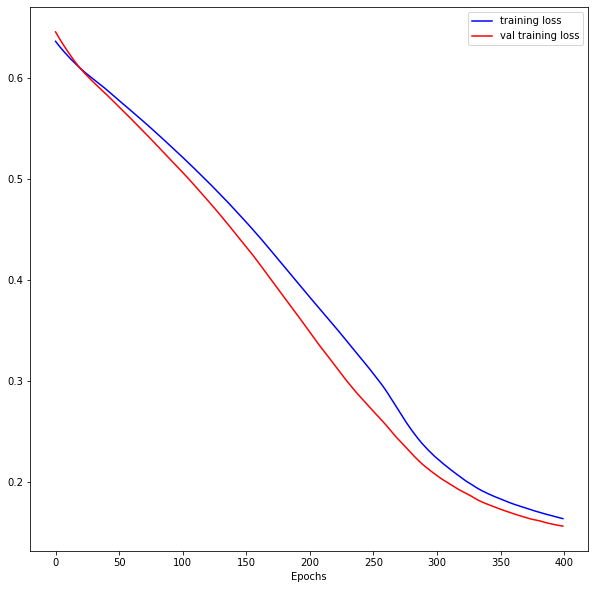

In [13]:
plot_loss(history1)

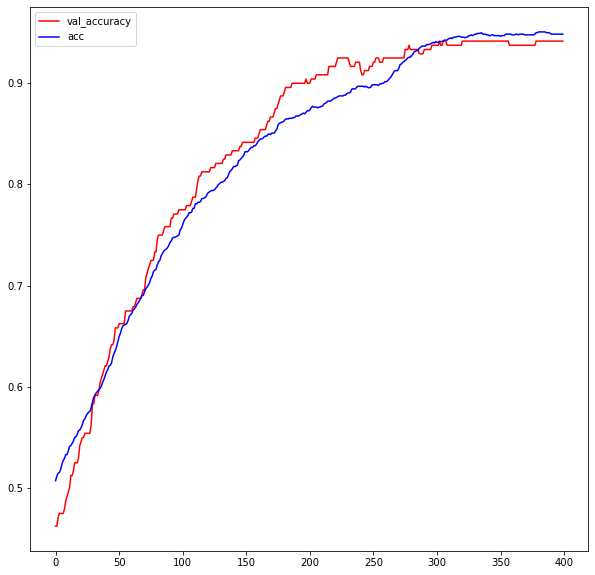

In [14]:
plot_acc(history1)

In [15]:
conf_matrix(model1)

[[761  32]
 [ 52 755]] 93.56 95.93


In [16]:
evaluate(model1)

Test loss:  0.17179604470729828
Test accuracy:  0.9275


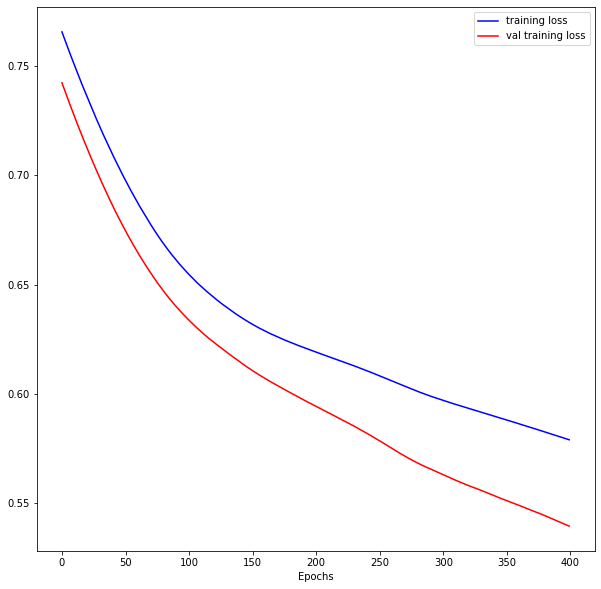

In [17]:
plot_loss(history2)

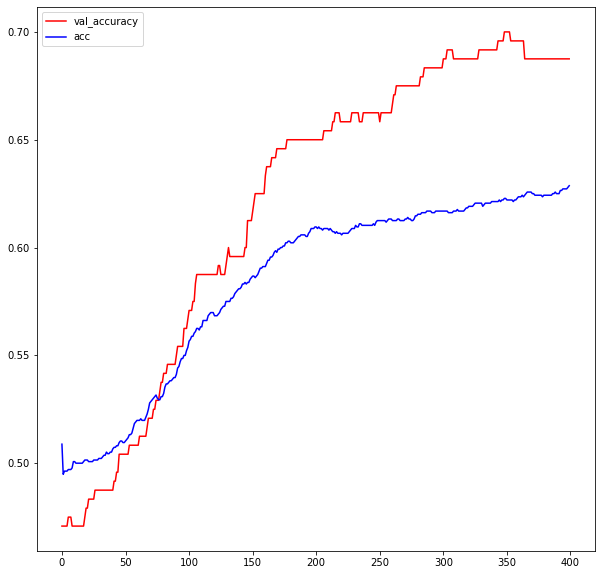

In [18]:
plot_acc(history2)

In [19]:
evaluate(model2)

Test loss:  0.5781761312484741
Test accuracy:  0.6375


In [20]:
conf_matrix(model2)

[[291 502]
 [ 78 729]] 90.33 59.22


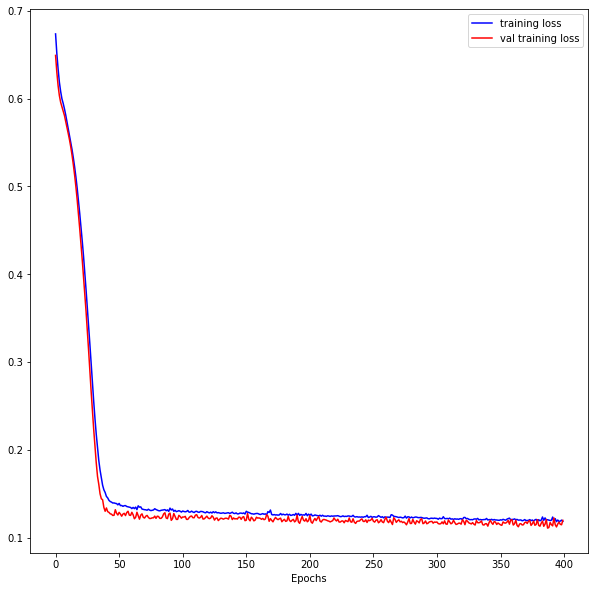

In [21]:
plot_loss(history3)

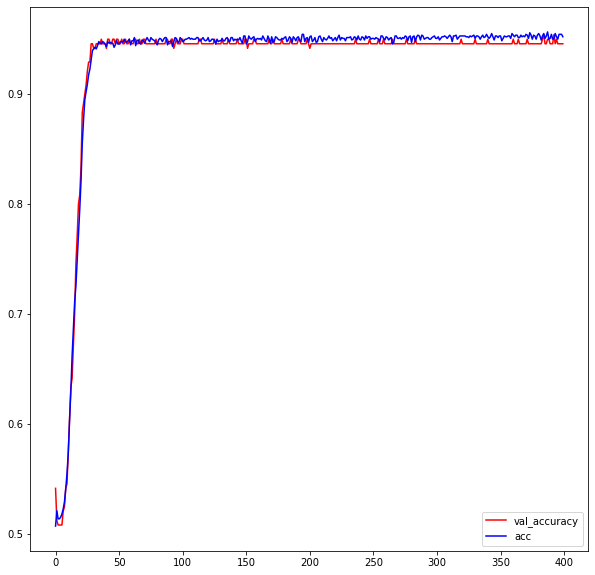

In [22]:
plot_acc(history3)

In [23]:
evaluate(model3)

Test loss:  0.1347745643556118
Test accuracy:  0.945


In [24]:
conf_matrix(model3)

[[768  25]
 [ 49 758]] 93.93 96.81
